In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb

In [2]:
df=pd.read_csv("C:/Users/USER/Desktop/DSA course/diamonds_new.csv")

In [3]:
df


,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [4]:
df.isnull()

,carat,cut,color,clarity,table,x,y,z,price_new
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [7]:
mean_carat = df['carat'].mean()
mean_table=df['table'].mean()
mode_color = df['color'].mode()[0]


In [8]:
mode_color

'G'

In [11]:
df['carat'].fillna(mean_carat, inplace=True)
df['table'].fillna(mean_table, inplace=True)
df['color'].fillna(mode_color, inplace=True)


In [12]:
df

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [13]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [ ]:
#All the null values are now compensated

In [14]:
columns = ['carat', 'price_new']


In [16]:
import matplotlib.pyplot as plt


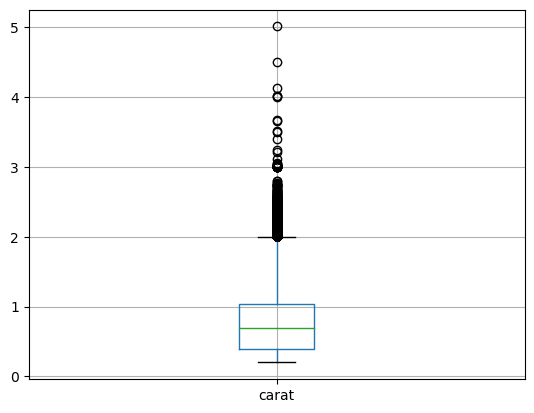

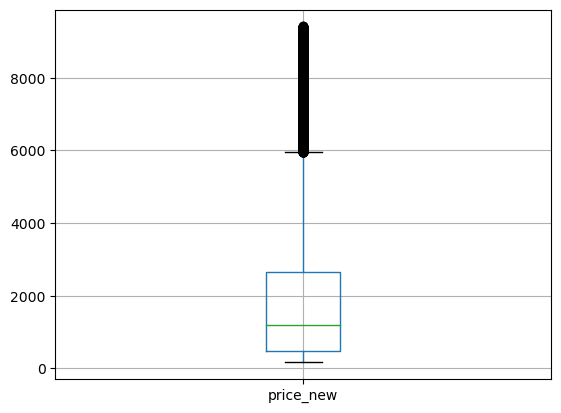

In [17]:
for column in columns:
    df.boxplot(column=column)
    plt.show()

In [18]:
for column in columns:
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 3
    df = df.drop(df[z_scores > threshold].index)

In [19]:
for column in columns:
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index)

In [20]:
df

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


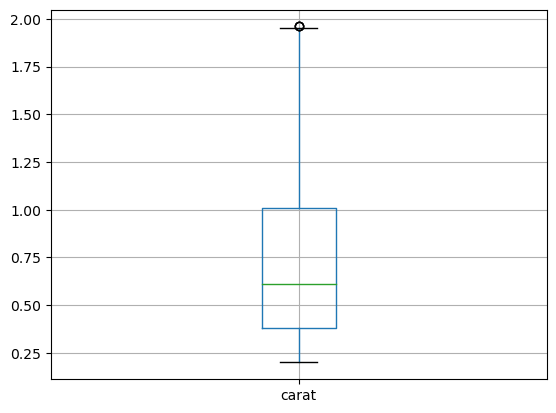

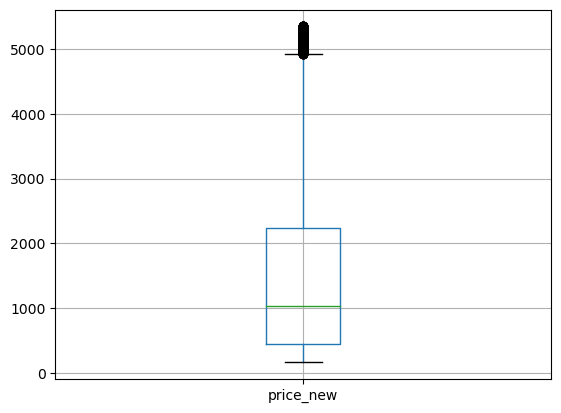

In [21]:
for column in columns:
    df.boxplot(column=column)
    plt.show()

In [ ]:
#Outliers are now normalized

In [23]:
one_hot = pd.get_dummies(df['color'])

In [26]:
one_hot

,D,E,F,G,H,I,J
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
53935,1,0,0,0,0,0,0
53936,1,0,0,0,0,0,0
53937,1,0,0,0,0,0,0
53938,0,0,0,0,1,0,0


In [24]:
df = pd.concat([df, one_hot], axis=1)


In [25]:
df

,carat,cut,color,clarity,table,x,y,z,price_new,D,E,F,G,H,I,J
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5,0,1,0,0,0,0,0
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5,1,0,0,0,0,0,0
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5,1,0,0,0,0,0,0
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5,1,0,0,0,0,0,0
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5,0,0,0,0,1,0,0


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()



In [31]:
df['cut'] = le.fit_transform(df['cut'])

In [32]:
df

,carat,cut,color,clarity,table,x,y,z,price_new,D,E,F,G,H,I,J
0,0.23,2,E,SI2,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,3,E,SI1,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
2,0.23,1,E,VS1,65.0,4.05,4.07,2.31,163.5,0,1,0,0,0,0,0
3,0.29,3,I,VS2,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,1,J,SI2,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,D,SI1,57.0,5.75,5.76,3.50,1378.5,1,0,0,0,0,0,0
53936,0.72,1,D,SI1,55.0,5.69,5.75,3.61,1378.5,1,0,0,0,0,0,0
53937,0.70,4,D,SI1,60.0,5.66,5.68,3.56,1378.5,1,0,0,0,0,0,0
53938,0.86,3,H,SI2,58.0,6.15,6.12,3.74,1378.5,0,0,0,0,1,0,0


In [33]:
df['clarity'] = le.fit_transform(df['clarity'])

In [34]:
df

,carat,cut,color,clarity,table,x,y,z,price_new,D,E,F,G,H,I,J
0,0.23,2,E,3,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,3,E,2,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
2,0.23,1,E,4,65.0,4.05,4.07,2.31,163.5,0,1,0,0,0,0,0
3,0.29,3,I,5,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,1,J,3,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,D,2,57.0,5.75,5.76,3.50,1378.5,1,0,0,0,0,0,0
53936,0.72,1,D,2,55.0,5.69,5.75,3.61,1378.5,1,0,0,0,0,0,0
53937,0.70,4,D,2,60.0,5.66,5.68,3.56,1378.5,1,0,0,0,0,0,0
53938,0.86,3,H,3,58.0,6.15,6.12,3.74,1378.5,0,0,0,0,1,0,0


In [35]:
df['color'] = le.fit_transform(df['color'])

In [36]:
df

,carat,cut,color,clarity,table,x,y,z,price_new,D,E,F,G,H,I,J
0,0.23,2,1,3,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,3,1,2,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
2,0.23,1,1,4,65.0,4.05,4.07,2.31,163.5,0,1,0,0,0,0,0
3,0.29,3,5,5,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,1,6,3,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,57.0,5.75,5.76,3.50,1378.5,1,0,0,0,0,0,0
53936,0.72,1,0,2,55.0,5.69,5.75,3.61,1378.5,1,0,0,0,0,0,0
53937,0.70,4,0,2,60.0,5.66,5.68,3.56,1378.5,1,0,0,0,0,0,0
53938,0.86,3,4,3,58.0,6.15,6.12,3.74,1378.5,0,0,0,0,1,0,0


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()


scaled_data = scaler.fit_transform(df)


scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

In [44]:
df

,carat,cut,color,clarity,table,x,y,z,price_new,D,E,F,G,H,I,J
0,0.23,2,1,3,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,3,1,2,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
2,0.23,1,1,4,65.0,4.05,4.07,2.31,163.5,0,1,0,0,0,0,0
3,0.29,3,5,5,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,1,6,3,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,57.0,5.75,5.76,3.50,1378.5,1,0,0,0,0,0,0
53936,0.72,1,0,2,55.0,5.69,5.75,3.61,1378.5,1,0,0,0,0,0,0
53937,0.70,4,0,2,60.0,5.66,5.68,3.56,1378.5,1,0,0,0,0,0,0
53938,0.86,3,4,3,58.0,6.15,6.12,3.74,1378.5,0,0,0,0,1,0,0


In [ ]:
#both onehot and label encoding done on the above data